<a href="https://colab.research.google.com/github/hamdia200/FormationgitODC/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

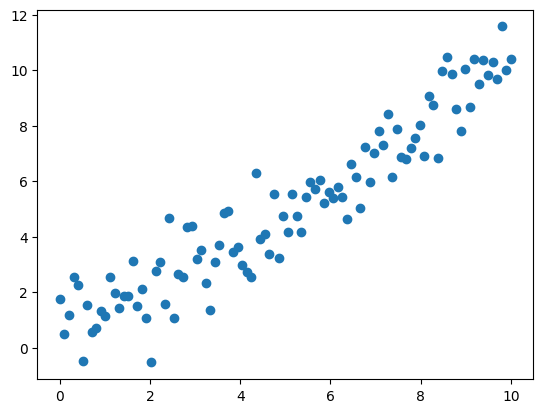

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)#Génere les meme valeurs aleatoires
m=100 # creation de 100 échatillons
X=np.linspace(0,10,m).reshape(m,1)
y=X+np.random.randn (m,1)

plt.scatter(x,y)

In [8]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X,y)# entrainement du modele
model.score(X,y)#évaluation avec le coéfficient de correction

0.8881140743377214

In [ ]:
np.random.seed(0)# Génere les meme valeurs aleatoires
m=100 # creation de 100 échatillons
X=np.linspace(0,10,m).reshape(m,1).reshape(m,1)
y=X**2+ np.random.randn (m,1)

In [11]:
from sklearn.svm import SVR
model=SVR (C=100)
model.fit(X,y)
model.score(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9060736430308509

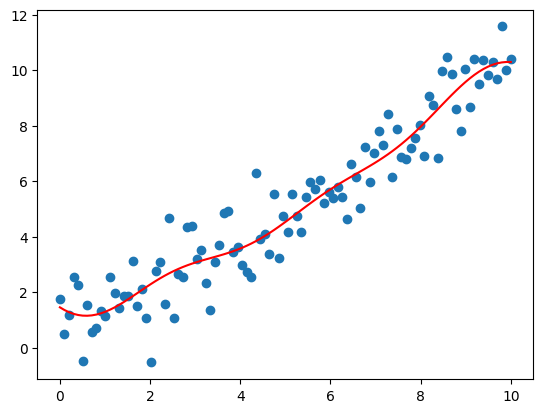

In [17]:
prediction =model.predict(x)
plt.scatter(x,y)
plt.plot(x,prediction,c='r')

In [15]:
titanic=sns.load_dataset('titanic')
titanic=titanic[['survived','pclass','sex','age']]
titanic


,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [16]:
titanic.isna().sum()

survived      0
pclass        0
sex           0
age         177
dtype: int64

In [18]:
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
...,...,...,...,...
885,0,3,1,39.0
886,0,2,0,27.0
887,1,1,1,19.0
889,1,1,0,26.0


In [20]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
y=titanic['survived']
X=titanic.drop('survived',axis=1).values

In [21]:
model.fit(X,y)
model.score(X,y)

0.8305322128851541

In [22]:

def survie(model,pclass=3, sex=0, age=26):
  x=np.array([pclass,sex,age]).reshape(1,3)
  print(f'la classe prédite est:{model.predict(x)}')
  print(f'la probabilité de chaque classe est:{model.predict_proba(x)}')

In [23]:
survie(model,1,0,33)

la classe prédite est:[1]
la probabilité de chaque classe est:[[0.4 0.6]]


##selection de meilleur modéle


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


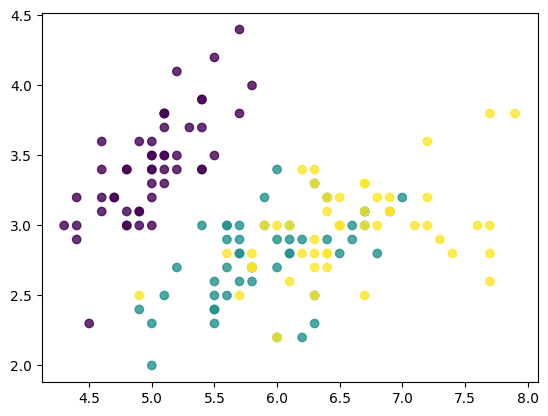

In [26]:
iris=load_iris() # charger le jeu des fleurs d'iris
X=iris.data #descripteur
y=iris.target #Variable à predire

print(X.shape)#la taille de jeu de donnée
plt.scatter(X[:,0],X[:,1], c=y,alpha=0.8)

In [27]:
from sklearn.model_selection import train_test_split

#Diviser les données en données d'apprentissage et en données test
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=5)
print('Train set :',X_train.shape)
print('Test set :',X_test.shape)

Train set : (120, 4)
Test set : (30, 4)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
print('Train score :',model.score(X_train,y_train))
print('Test score :',model.score(X_test,y_test))

Train score : 1.0
Test score : 0.9


In [29]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
print('Train score :',model.score(X_train,y_train))
print('Test score :',model.score(X_test,y_test))

Train score : 0.975
Test score : 0.9333333333333333


In [30]:
model=KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)
print('Train score :',model.score(X_train,y_train))
print('Test score :',model.score(X_test,y_test))

Train score : 0.9833333333333333
Test score : 0.9666666666666667


In [31]:
model=KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,y_train)
print('Train score :',model.score(X_train,y_train))
print('Test score :',model.score(X_test,y_test))

Train score : 0.9833333333333333
Test score : 0.9666666666666667


##Recherche de meilleurs parametre(GridSearch)



In [36]:
from sklearn.model_selection import GridSearchCV

param_grid ={'n_neighbors':np.arange(1,20), 'metric':['euclidian','manhattan']}
model=KNeighborsClassifier()
grid=GridSearchCV(model, param_grid,cv=5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
95 fits failed out of a total of 190.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidian', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [37]:
#meilleur score
grid.best_score_

0.975

In [38]:
#meilleurs parametre
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [39]:
model= grid.best_estimator_
model.score(X_test, y_test)

0.8666666666666667

##Matrice de confusion

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test,model.predict(X_test))

print(f'\n**************{model.__class__.__name__}*************\n')
print(f'Score={model.score(X_test,y_test)}')
print("\nMatrice de confusion:")
print(f'{confusion_matrix(y_test,model.predict(X_test))}')
print(classification_report(y_test,model.predict(X_test)))


**************KNeighborsClassifier*************

Score=0.8666666666666667

Matrice de confusion:
[[8 0 0]
 [0 9 2]
 [0 2 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.82      0.82      0.82        11
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30

